# Classification 

The aim of this project is build multiple classifiers to predict whether a Breast Cancer is Malignant or Benign and compare their performances 

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
sns.set(style="darkgrid")
sns.set_palette("deep")
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.feature_selection import RFE,RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB



In [2]:
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('Seaborn ', sns.__version__)

Numpy:  1.14.3
Pandas:  0.23.0
Seaborn  0.9.0


In [3]:
# Loading the breast cancer dataset from sklearn
cancer = datasets.load_breast_cancer()

In [4]:
#print(cancer.DESCR)

In [5]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
# Loading the dataset as a pandas data frame 
cancer_df = pd.DataFrame(data= cancer.data,columns = cancer.feature_names) 
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [8]:
#Adding the target variable to the dataframe for analysis 
cancer_df['Class'] = cancer.target
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...    worst texture  worst perimeter  worst area  \
0                 0.07871  ...            17.33           184.60      2019.0   
1                 0.05667  ...            23.41           158.80      1956.0   
2                 0.05999  ...            25.53           152.50      1709.0   
3                 0.09744  ...            26.50            98.87       567.7   
4                 0.05883  ...            16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  Class  
0          0.4601                  0.11890      0  
1          0.2750                  0.08902      0  
2          0.3613                  0.08758      0  
3          0.6638                  0.17300      0  
4          0.2364                  0.07678      0  

[5 rows x 31 columns]

In [9]:
print(cancer_df.groupby('Class').size())

Class
0    212
1    357
dtype: int64


From our data dictionary we have our class distribution as  212 - Malignant, 357 - Benign. Therefore, based on the above we can label our classes as 0 for Malignant and 1 for Benign. 

In [10]:
count_Malignant = len(cancer_df[cancer_df['Class']==0])
count_Benign = len(cancer_df[cancer_df['Class']==1])
pct_Malignant = count_Malignant/(count_Malignant+count_Benign)
print("percentage of Malignant Classes", pct_Malignant*100)
pct_Benign = count_Benign/(count_Malignant+count_Benign)
print("percentage of Benign Classes", pct_Benign*100)

percentage of Malignant Classes 37.258347978910365
percentage of Benign Classes 62.741652021089635


## Data Analysis

In [11]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

Our dataset has no missing values 

In [12]:
cancer_df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension     ...      worst texture  \
count     569.000000              569.000000     ...         569.000000   
mean        0.181162                0.062798     ...          25.677223   
std         0.027414                0.007060     ...           6.146258   
min         0.106000                0.049960     ...          12.020000   
25%         0.161900                0.057700     ...          21.080000   
50%         0.179200                0.061540     ...          25.410000   
75%         0.195700                0.066120     ...          29.720000   
max         0.304000                0.097440     ...          49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension       Class  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

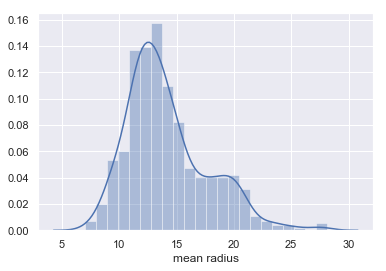

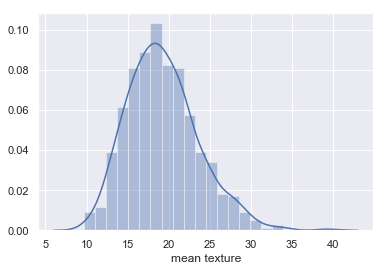

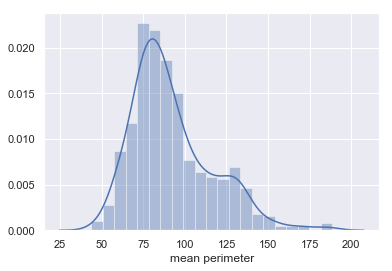

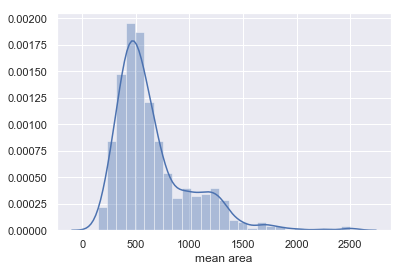

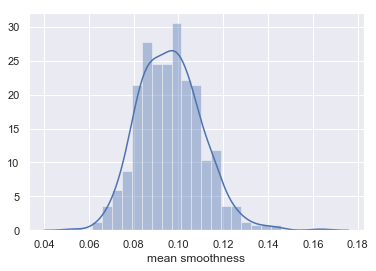

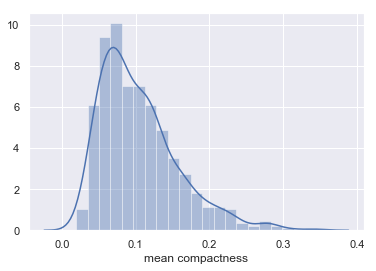

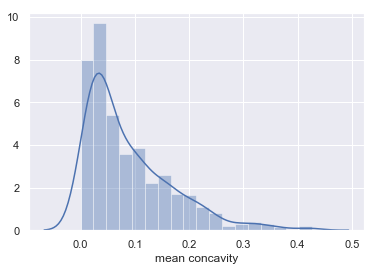

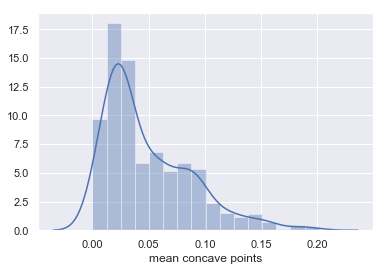

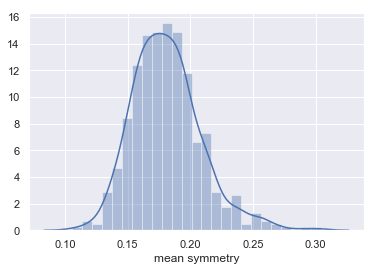

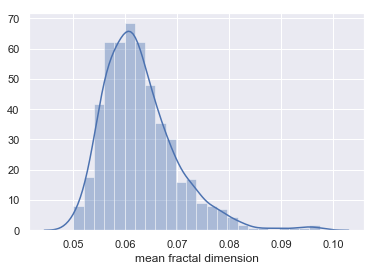

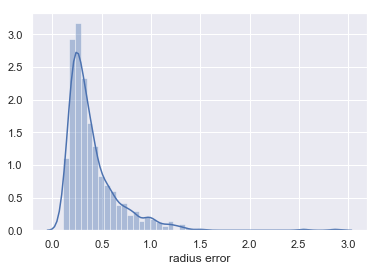

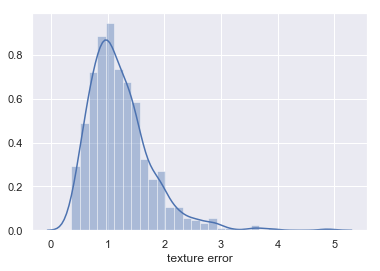

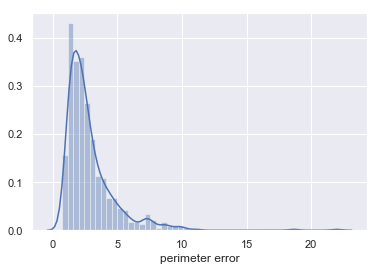

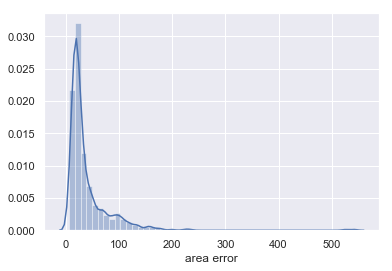

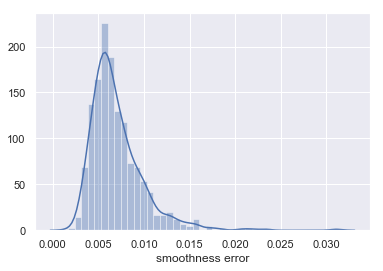

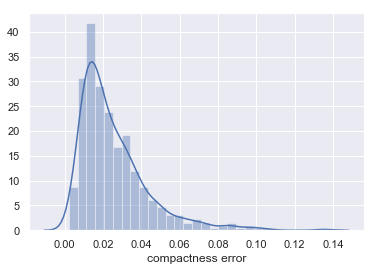

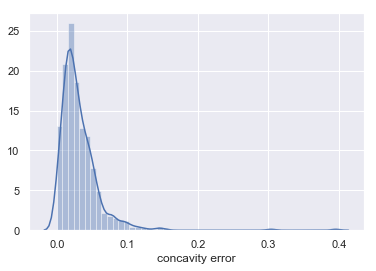

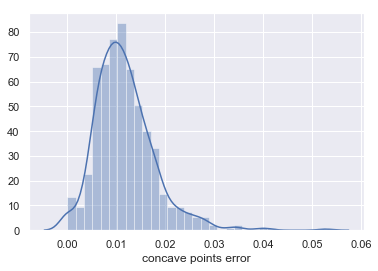

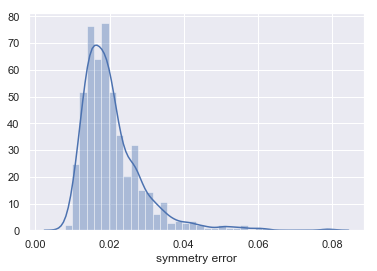

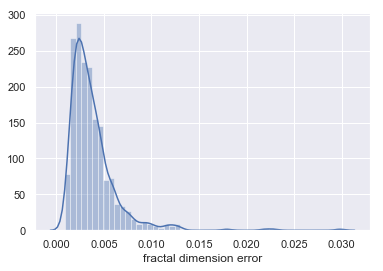

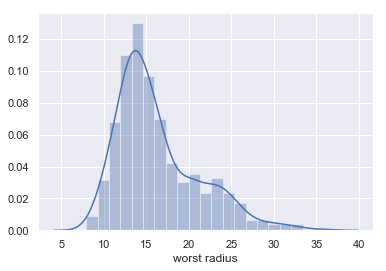

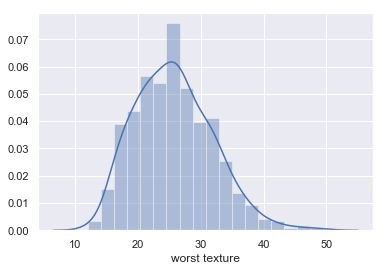

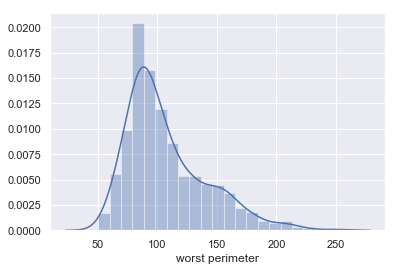

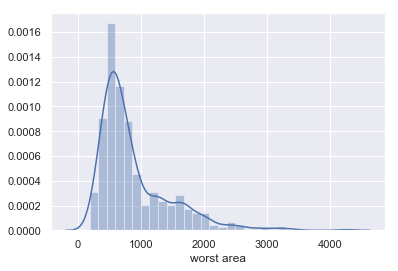

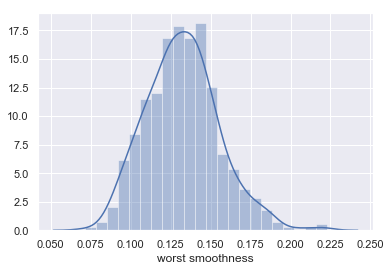

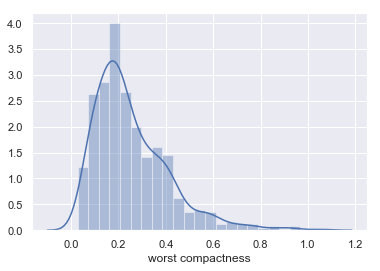

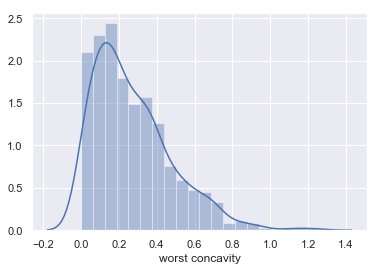

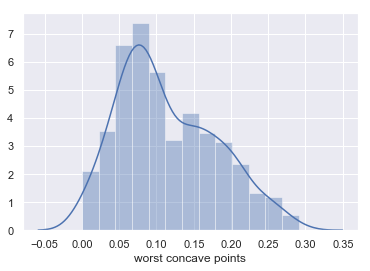

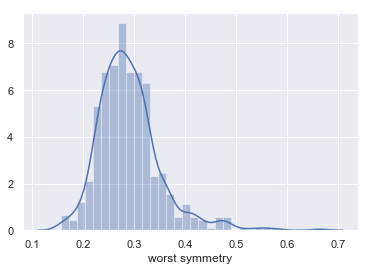

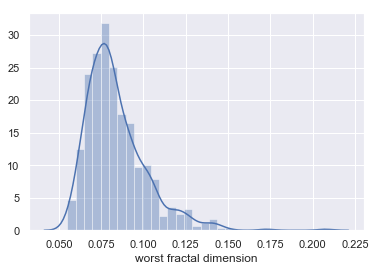

In [13]:
#lets examine the distributions of each of our explanatory feature variables 
cols = cancer.feature_names
for col in cols:
    sns.distplot(cancer_df[col])
    plt.show()

In [14]:
cancer_df.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

From the above we can see that we have a few features that are normally distributed whereas the rest have a skewed distribution. Also as there are no negative values indicating that the recordings in the dataset have no measurement errors

From the graphs and the skew results, we can find the values closer to zero are mean radius, mean perimeter,mean compactness, mean concavity ,mean concave points,worst radius,worst perimeter, worst concavity. These features can be useful in predicting the cancer type. 

## Dataframe Split

Lets now divide our original dataframe into 3 dataframes for analysis based on mean, error and worst values. 

In [15]:
mean_data = cancer_df[['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness',
                       'mean concavity','mean concave points','mean symmetry','mean fractal dimension','Class']]
error_data = cancer_df[['radius error','texture error','perimeter error','area error','smoothness error','compactness error',
                        'concavity error','concave points error','symmetry error','fractal dimension error','Class']]
worst_data = cancer_df[['worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness',
                       'worst concavity','worst concave points','worst symmetry','worst fractal dimension','Class']]

### Correlation

C:\Users\ruchi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ruchi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


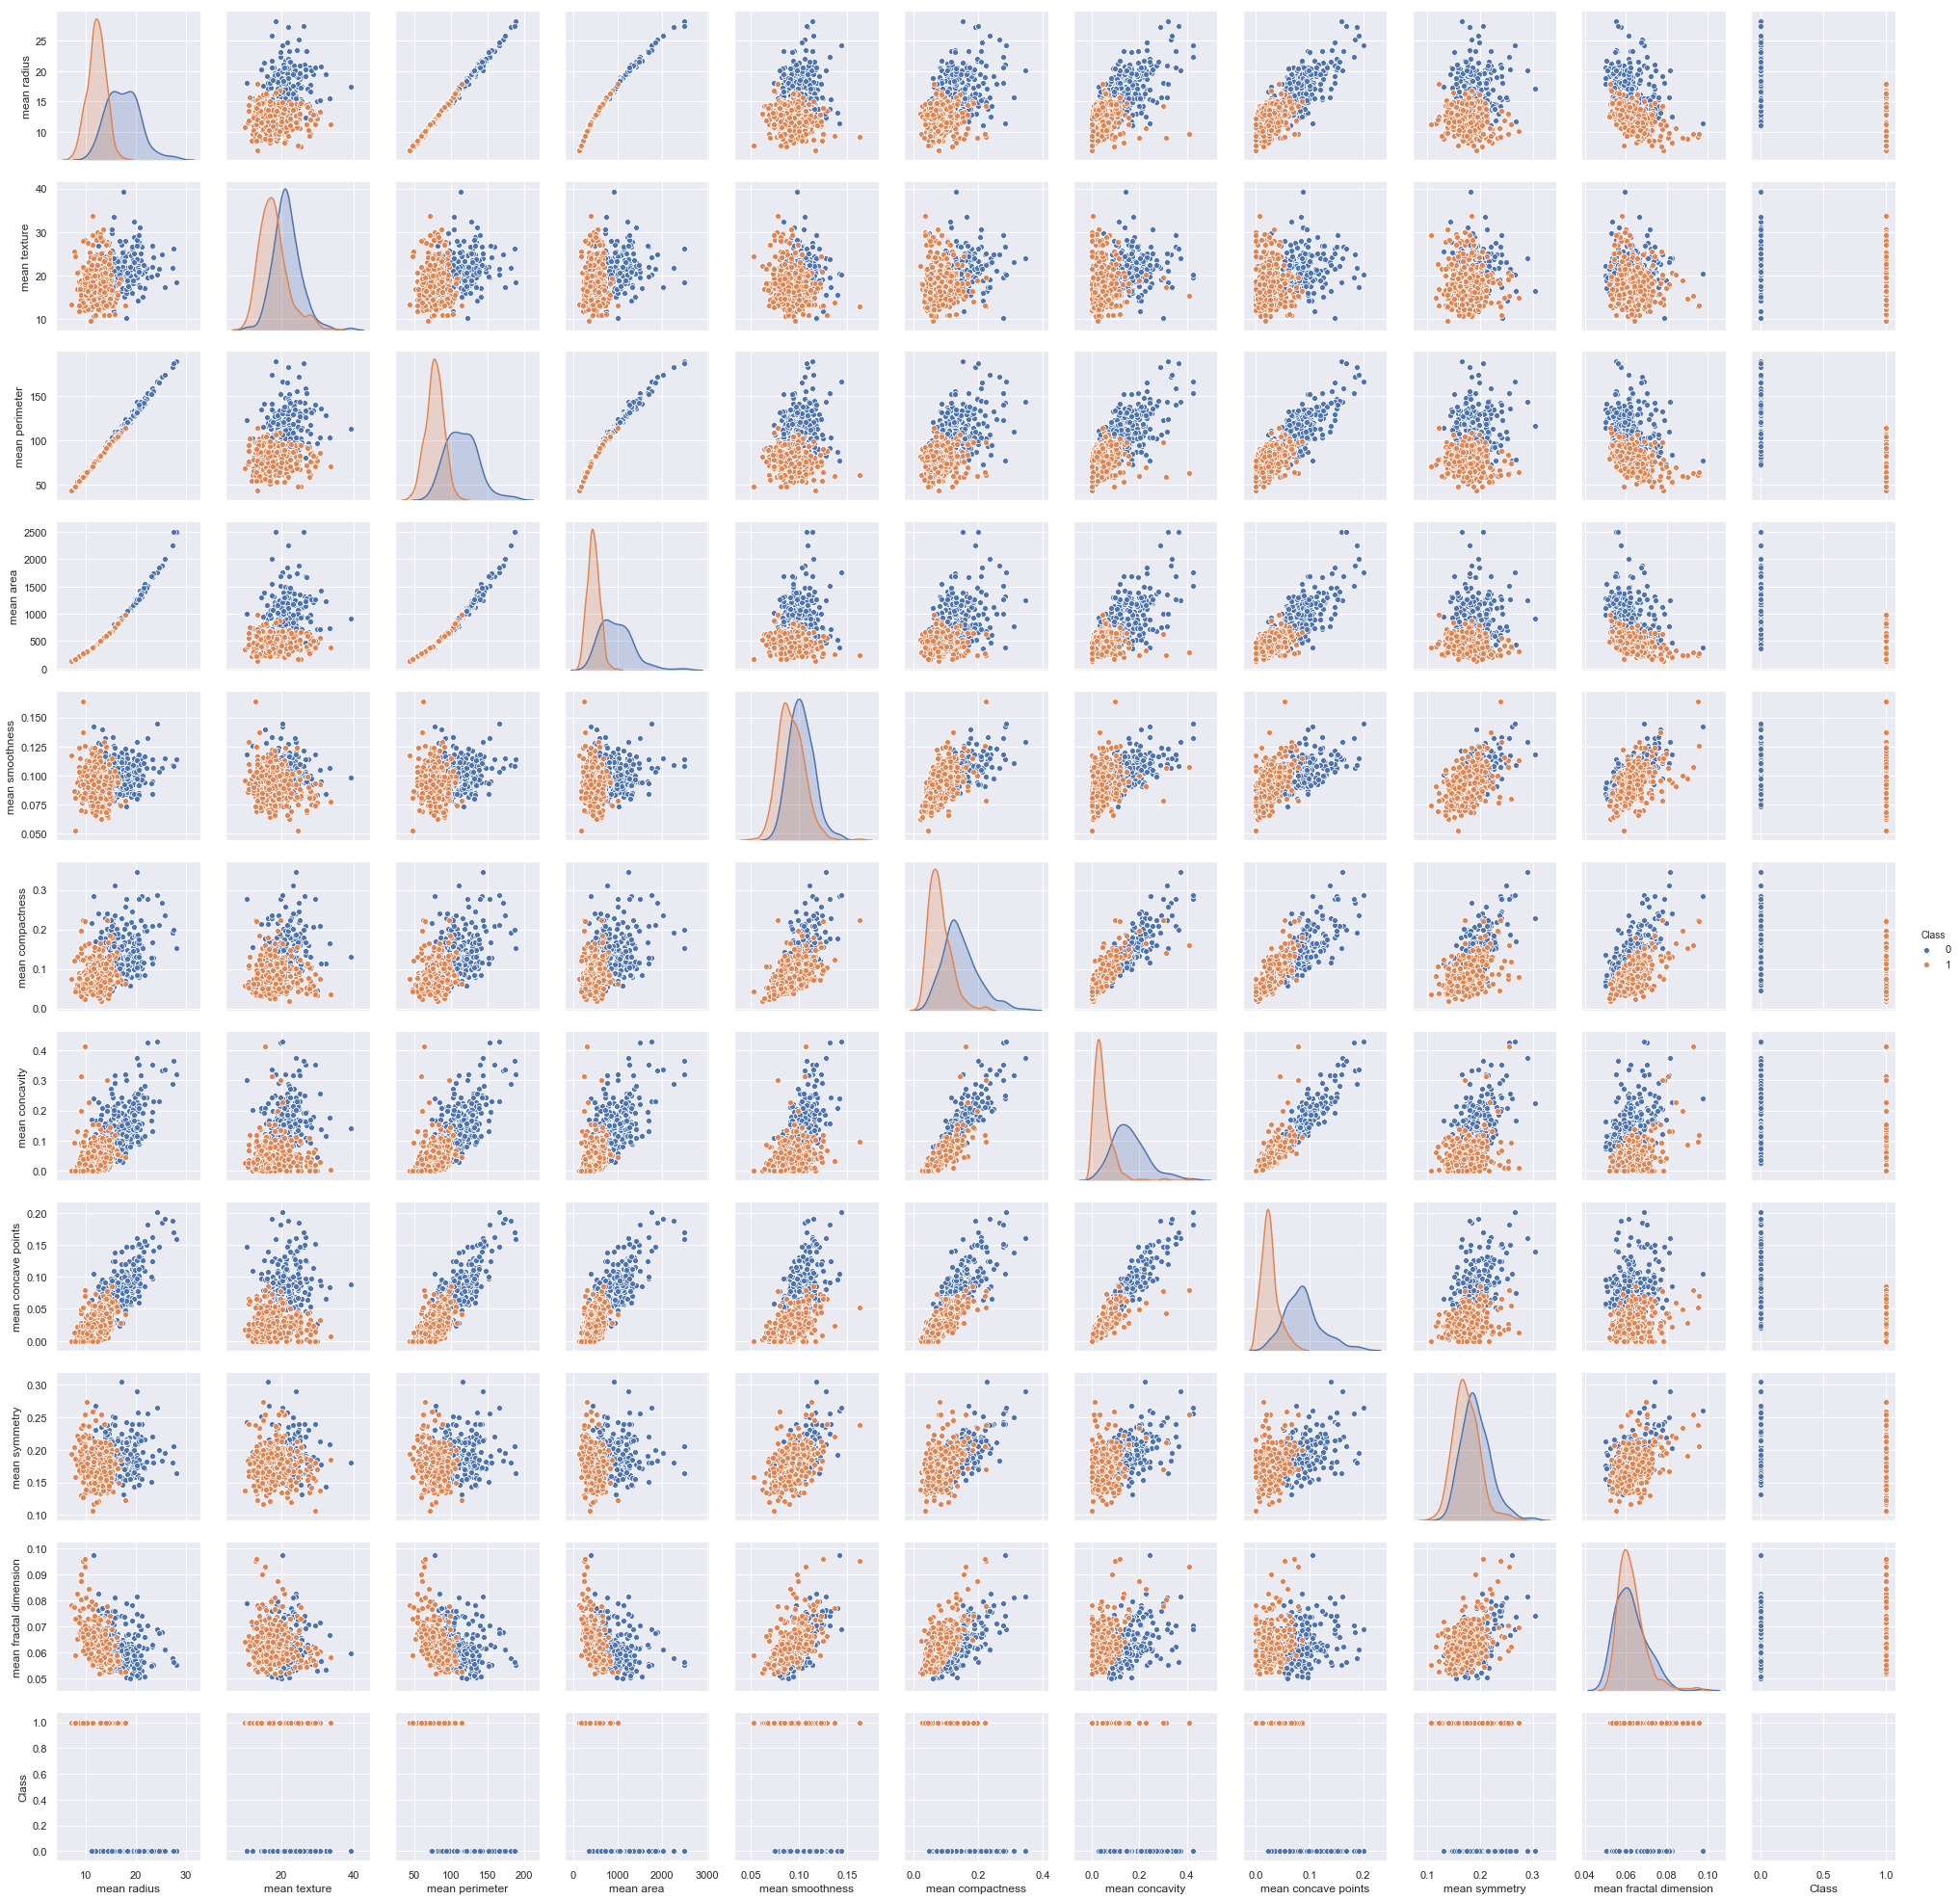

In [16]:
sns.pairplot(mean_data,hue = 'Class')
plt.show()

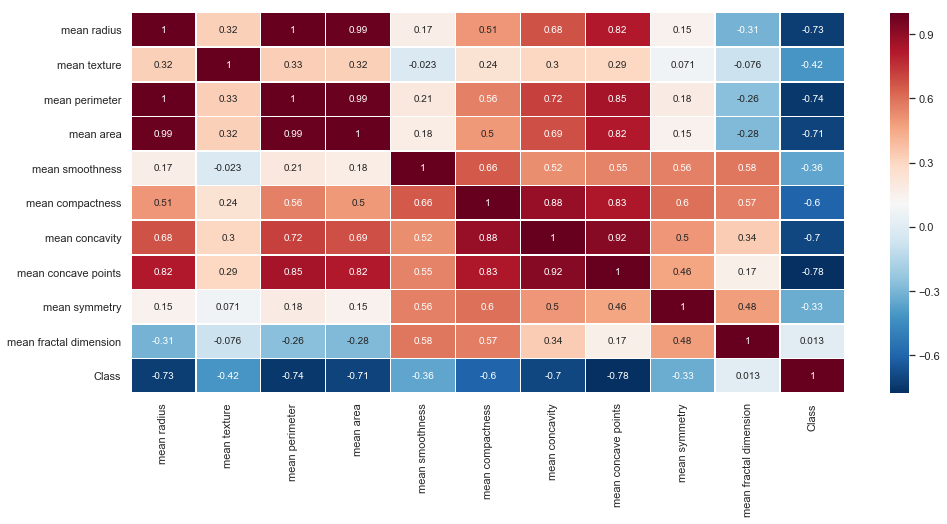

In [17]:
#Correlation Matrix
corr = mean_data.corr()
plt.figure(figsize = (16,7))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot = True,cmap="RdBu_r",linewidths=.5)

C:\Users\ruchi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ruchi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


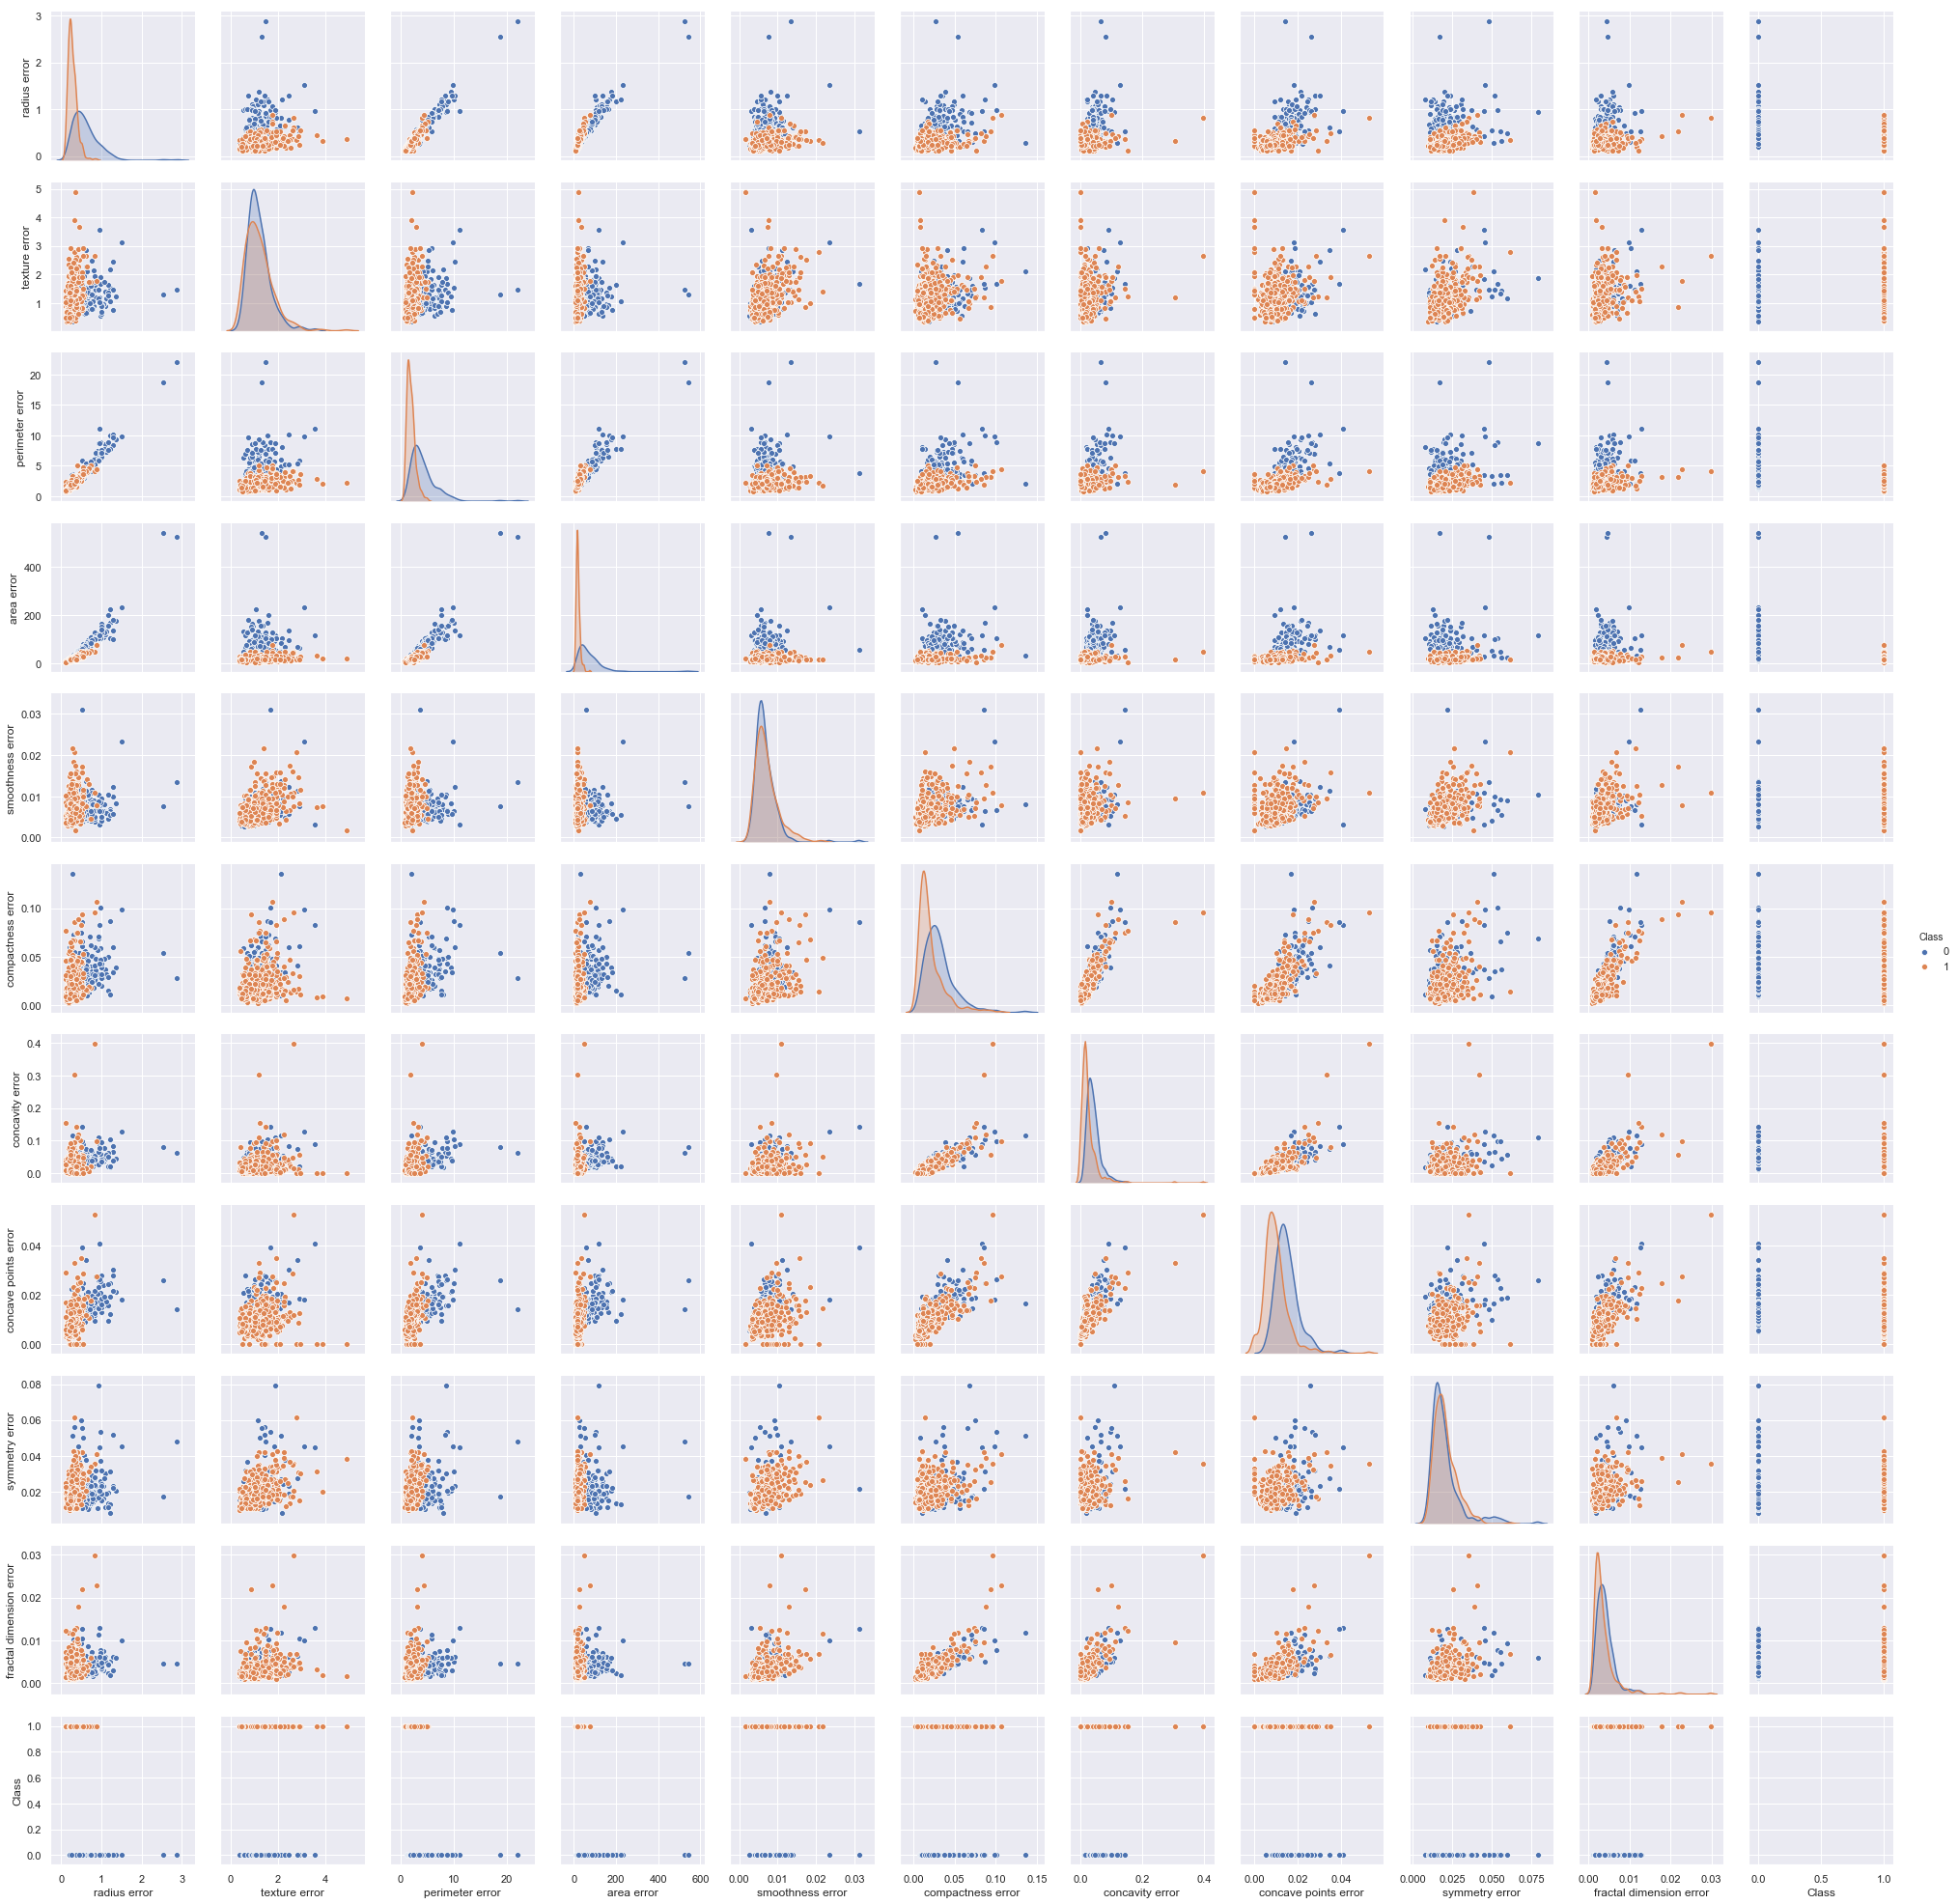

In [18]:
sns.pairplot(error_data,hue = 'Class')
plt.show()

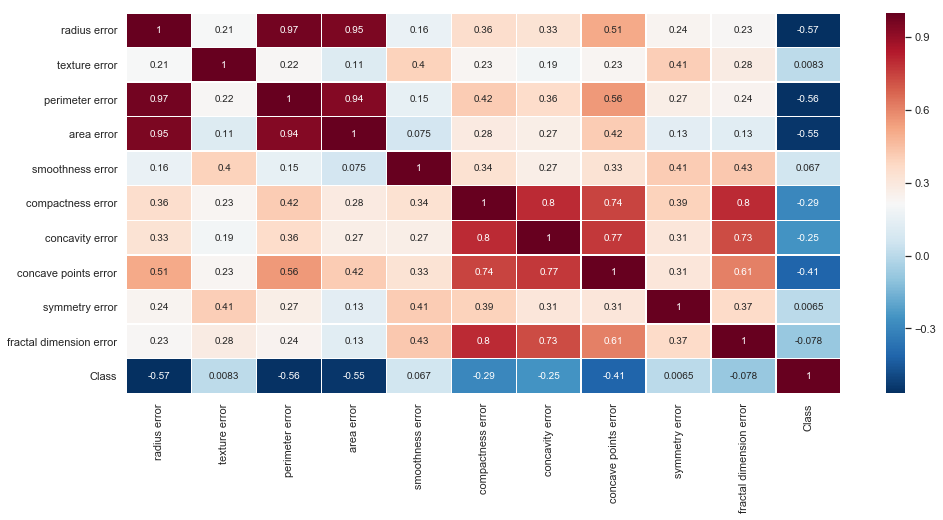

In [19]:
#Correlation Matrix
corr = error_data.corr()
plt.figure(figsize = (16,7))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot = True,cmap="RdBu_r",linewidths=.5)

C:\Users\ruchi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ruchi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


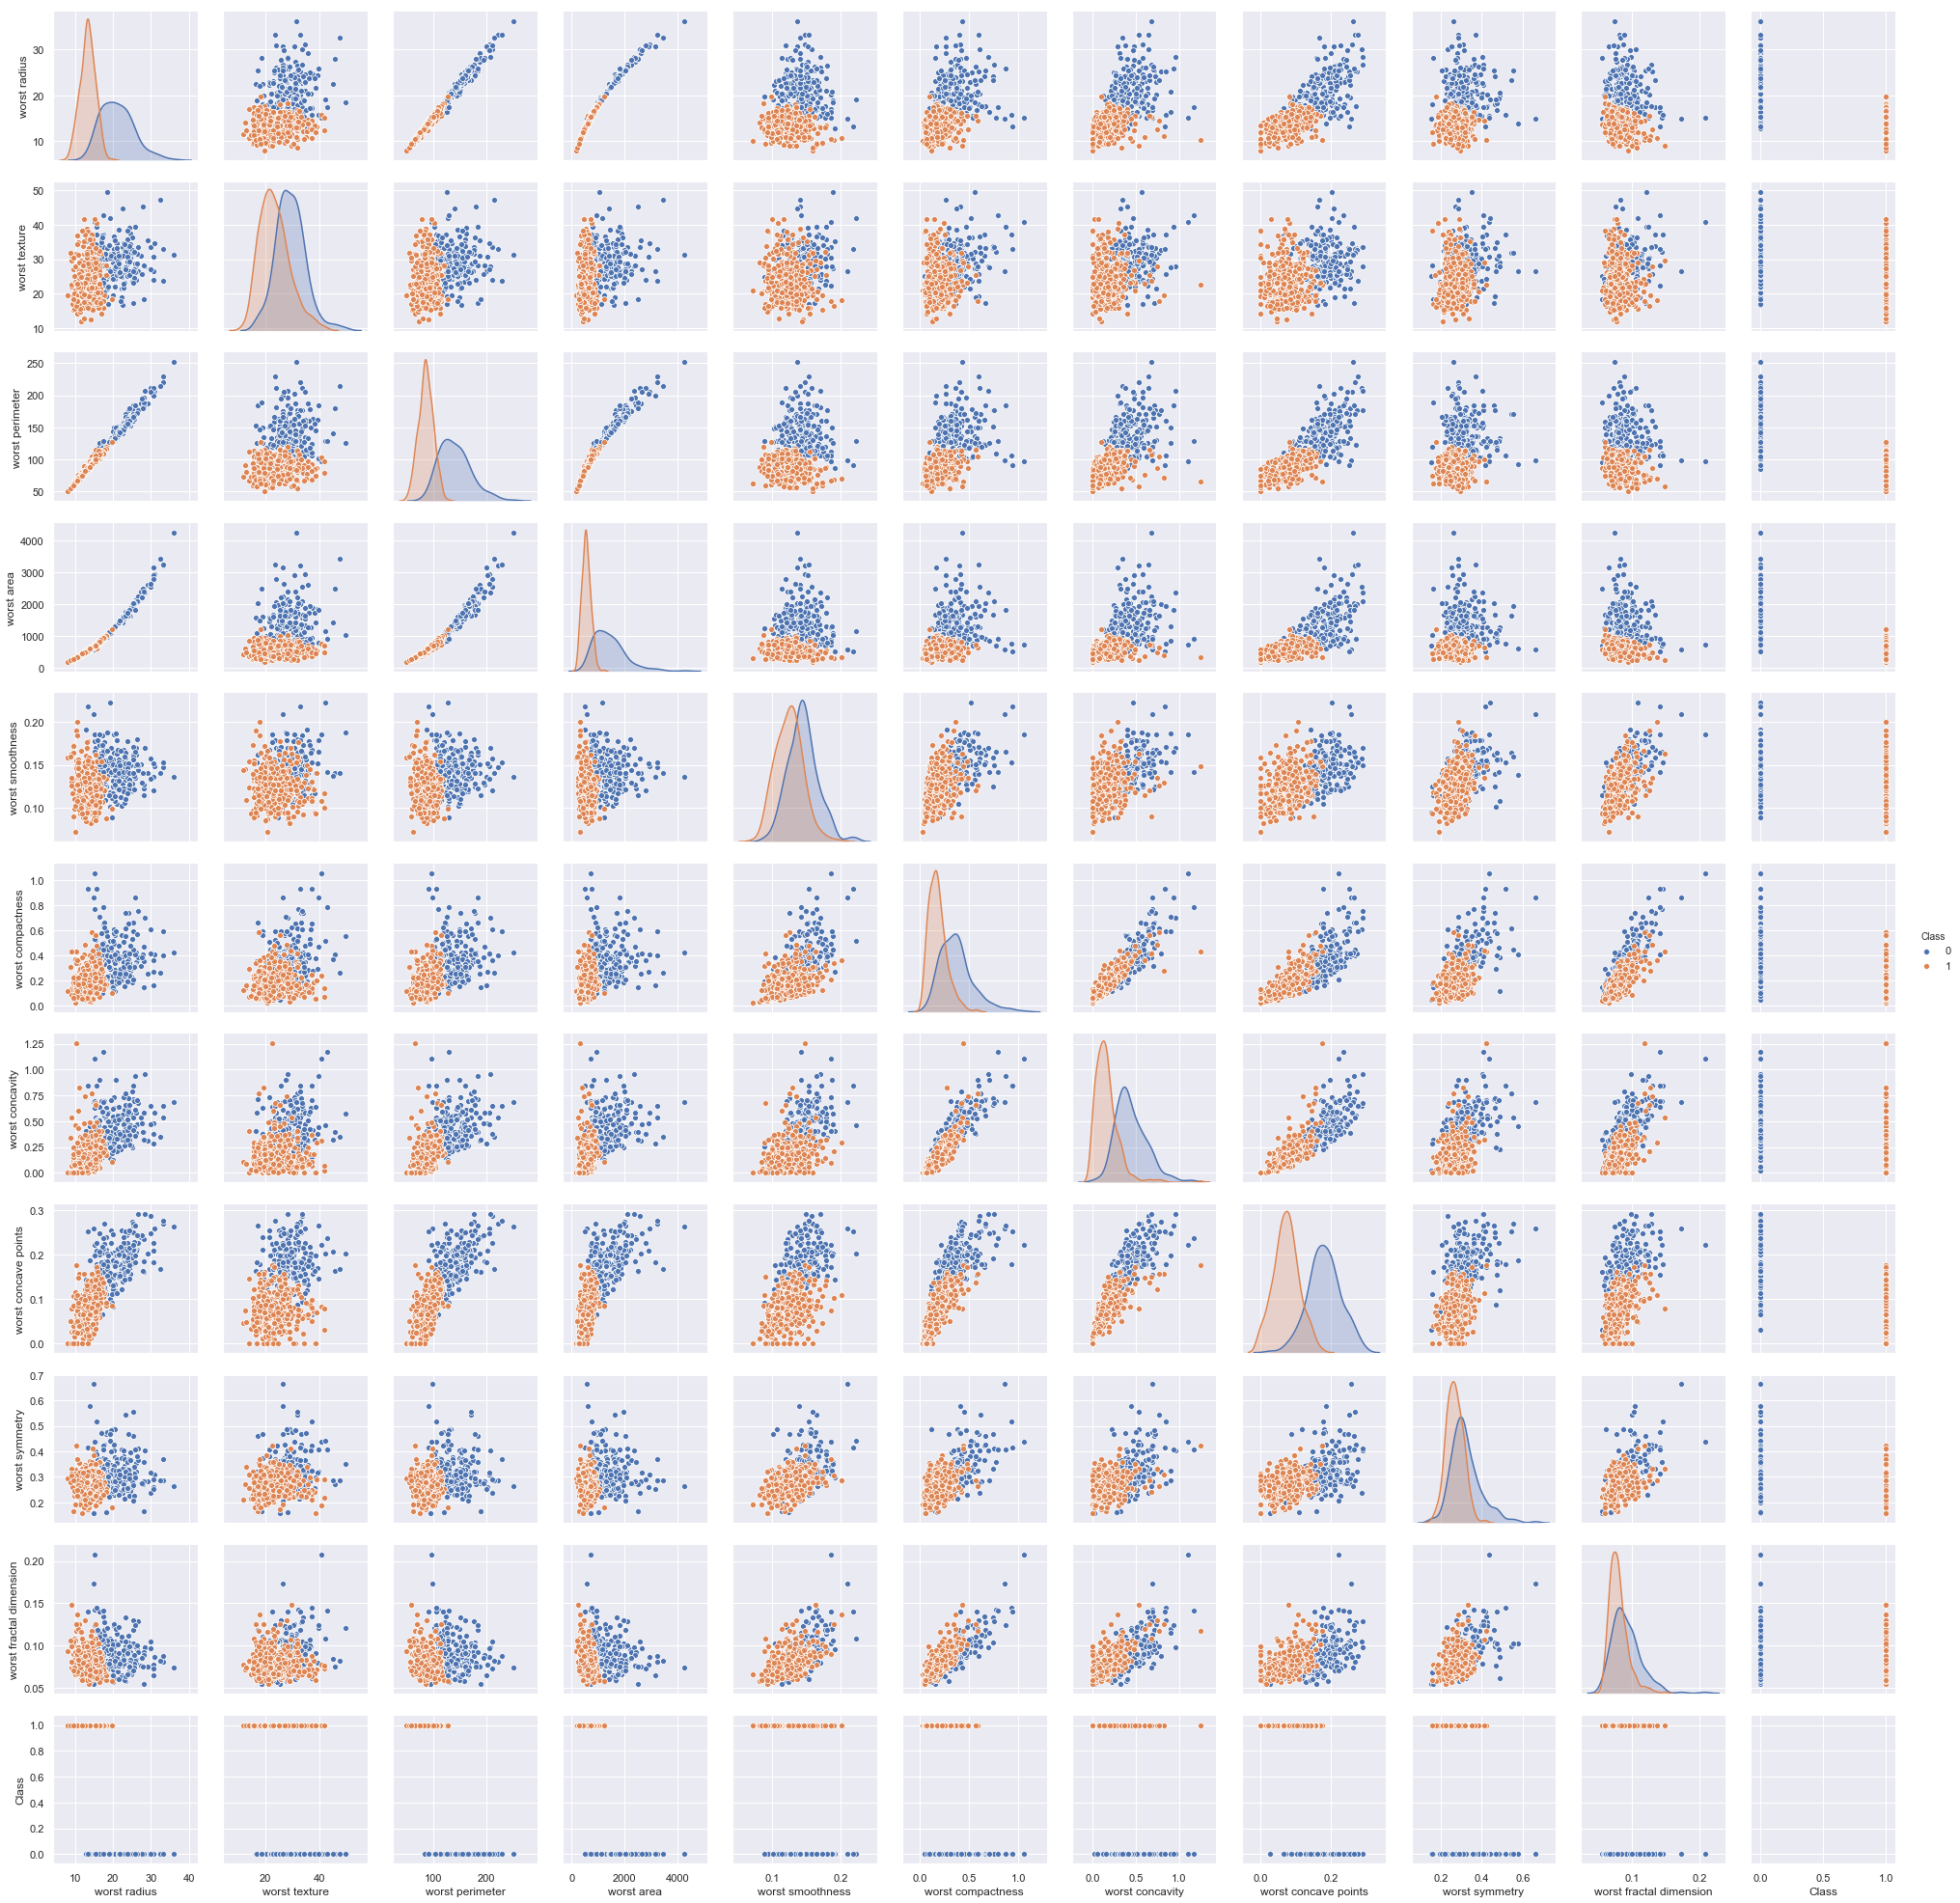

In [20]:

sns.pairplot(worst_data,hue = 'Class')
plt.show()

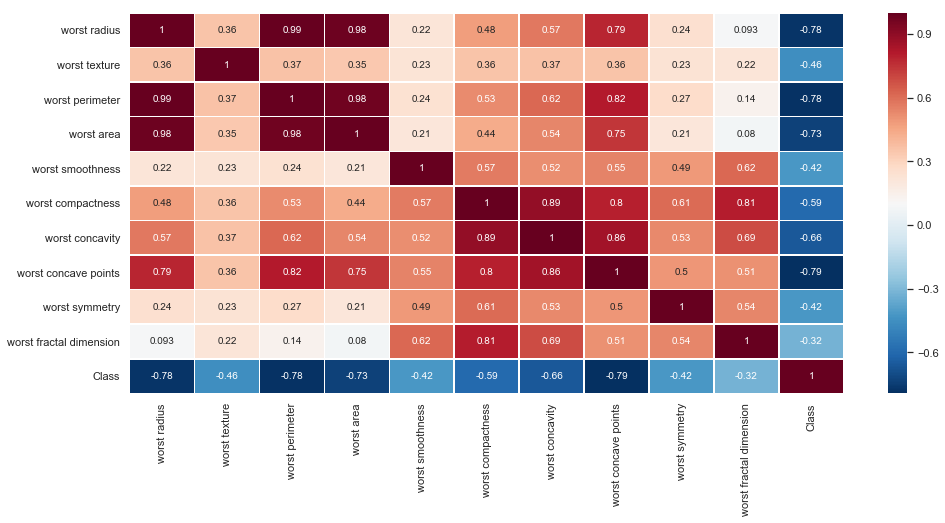

In [21]:
#Correlation Matrix
corr = worst_data.corr()
plt.figure(figsize = (16,7))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot = True,cmap="RdBu_r",linewidths=.5)

Following observations can be made by inspecting the correlations: 

1) Our class variables are highly negatively correlated with the radius, perimeter ,area and concave points for all the three attribute types (i.e mean, standard error and worst). Thus these are strong predictors for our classes. 

2) The mean attribute type also has 2 additional strong negative correlated features with our class variable  i.e concavity & compactness. Therfore, let's build our model on the mean attribute type values

3) Perimeter, Radius and Area features are strongly correlated to each other. This makes sense as the radius is included in the calculation of Area and Perimeter and therfore Area and Perimeter will be dropped before building our model 

## Splitting Dataset for modelling 

In [22]:
#defining the independent variables for our model by removing the Price, Perimeter and Area column from the mean attribute types
X = mean_data.drop(columns = ['Class','mean perimeter','mean area'])
#X.head()

In [23]:
# defining the target variable 
y = cancer.target # set the target variable

In [24]:
## Splitting the dataset into Training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

# Modelling

## Logistic Regression

In [25]:
logmodel = LogisticRegressionCV(cv=10)

In [26]:
logmodel.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [27]:
y_pred = logmodel.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.92      0.92      0.92        63
          1       0.95      0.95      0.95       108

avg / total       0.94      0.94      0.94       171



In [29]:
print(confusion_matrix(y_test,y_pred))

[[ 58   5]
 [  5 103]]


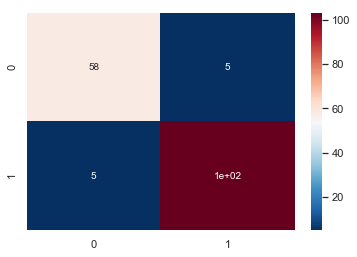

In [30]:
#['TN' 'FP']
#['FN' 'TP']
sns.heatmap(confusion_matrix(y_test,y_pred),cmap="RdBu_r",annot=True)
plt.show()

In [31]:
accuracy_score(y_test,y_pred)

0.9415204678362573

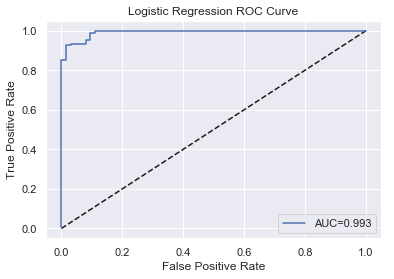

In [32]:
y_pred_prob = logmodel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_LR = roc_auc_score(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="AUC=%.3f" %auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

## SVM

In [33]:
SVM = svm.SVC(C=0.1,probability = True)
scores = cross_val_score(SVM, X_train, y_train, cv=10)
scores  

array([0.85      , 0.875     , 0.925     , 0.9       , 0.975     ,
       0.95      , 0.9       , 0.85      , 0.85      , 0.84210526])

In [34]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.09)


In [35]:
SVM.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
SVM_y_pred = cross_val_predict(SVM, X_test,y_test ,cv=10)

In [37]:
print(classification_report(y_test,SVM_y_pred))

             precision    recall  f1-score   support

          0       0.98      0.65      0.78        63
          1       0.83      0.99      0.90       108

avg / total       0.88      0.87      0.86       171



In [38]:
print(confusion_matrix(y_test,SVM_y_pred))

[[ 41  22]
 [  1 107]]


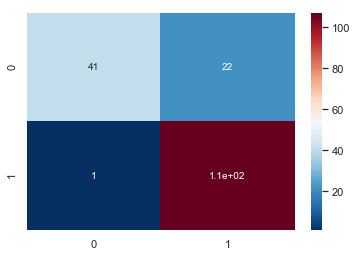

In [39]:
sns.heatmap(confusion_matrix(y_test,SVM_y_pred),cmap="RdBu_r",annot=True)
plt.show()

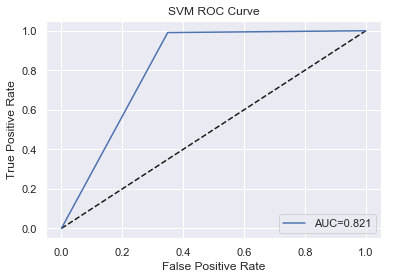

In [40]:
SVM_y_pred_prob = SVM.predict_proba(X_test)[:,1]
fprs, tprs, thresholds_svm = roc_curve(y_test,SVM_y_pred)
auc_SVM = roc_auc_score(y_test,SVM_y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprs, tprs,label="AUC=%.3f" %auc_SVM)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()

## KNN

In [41]:
knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, X_train, y_train, cv=10)
scores_knn

array([0.85      , 0.9       , 0.9       , 0.9       , 0.9       ,
       0.95      , 0.825     , 0.825     , 0.875     , 0.84210526])

In [42]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

Accuracy: 0.88 (+/- 0.08)


In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
knn_y_pred = cross_val_predict(knn, X_test,y_test ,cv=10)

In [45]:
print(classification_report(y_test,knn_y_pred))

             precision    recall  f1-score   support

          0       0.91      0.78      0.84        63
          1       0.88      0.95      0.92       108

avg / total       0.89      0.89      0.89       171



In [46]:
print(confusion_matrix(y_test,knn_y_pred))

[[ 49  14]
 [  5 103]]


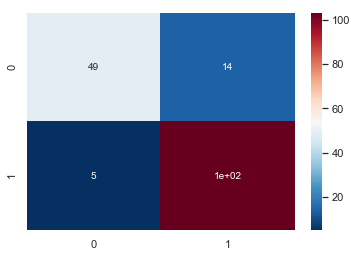

In [47]:
sns.heatmap(confusion_matrix(y_test,knn_y_pred),cmap="RdBu_r",annot=True)
plt.show()

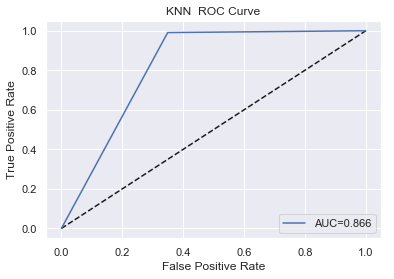

In [48]:
knn_y_pred_prob = knn.predict_proba(X_test)[:,1]
fprk, tprk, thresholds_knn = roc_curve(y_test,knn_y_pred)
auc_KNN = roc_auc_score(y_test,knn_y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprs, tprs,label="AUC=%.3f" %auc_KNN)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN  ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [49]:
nb = GaussianNB()
scores_nb = cross_val_score(nb, X_train, y_train, cv=10)
scores_nb

array([0.925     , 0.95      , 0.925     , 0.9       , 0.875     ,
       0.925     , 0.95      , 0.875     , 0.95      , 0.92105263])

In [50]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

Accuracy: 0.88 (+/- 0.08)


In [51]:
nb.fit(X_train,y_train)

GaussianNB(priors=None)

In [52]:
nb_y_pred = cross_val_predict(nb, X_test,y_test ,cv=10)

In [53]:
print(classification_report(y_test,nb_y_pred))

             precision    recall  f1-score   support

          0       0.92      0.86      0.89        63
          1       0.92      0.95      0.94       108

avg / total       0.92      0.92      0.92       171



In [54]:
print(confusion_matrix(y_test,nb_y_pred))

[[ 54   9]
 [  5 103]]


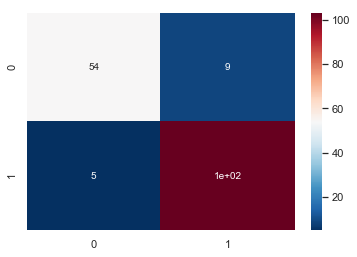

In [55]:
sns.heatmap(confusion_matrix(y_test,nb_y_pred),cmap="RdBu_r",annot=True)
plt.show()

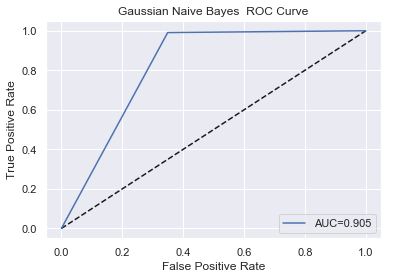

In [56]:
nb_y_pred_prob = nb.predict_proba(X_test)[:,1]
fprb, tprb, thresholds_nb = roc_curve(y_test,nb_y_pred)
auc_nb = roc_auc_score(y_test,nb_y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprs, tprs,label="AUC=%.3f" %auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes  ROC Curve')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for Performance Comparision

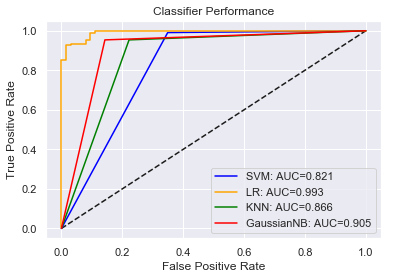

In [57]:
#Plotting TPR and FPR 
fprs, tprs, thresholds_svm = roc_curve(y_test,SVM_y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
fprk, tprk, thresholds_knn = roc_curve(y_test,knn_y_pred)
fprb, tprb, thresholds_nb = roc_curve(y_test,nb_y_pred)
#AUC
auc_SVM = roc_auc_score(y_test,SVM_y_pred)
auc_LR = roc_auc_score(y_test, y_pred_prob)
auc_KNN = roc_auc_score(y_test,knn_y_pred)
auc_nb = roc_auc_score(y_test,nb_y_pred)
#Threshold line 
plt.plot([0, 1], [0, 1], 'k--')
#Classifier ROC curves
plt.plot(fprs, tprs, color = 'blue', label="SVM: AUC=%.3f" %auc_SVM)
plt.plot(fpr, tpr, color = 'orange',label="LR: AUC=%.3f" %auc_LR)
plt.plot(fprk, tprk, color = 'green',label="KNN: AUC=%.3f" %auc_KNN)
plt.plot(fprb, tprb, color = 'red',label="GaussianNB: AUC=%.3f" %auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifier Performance')
plt.legend(loc="lower right")
plt.show()

From the above we can see that Logistic Regression performed the best on our data 